In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# <font color = 'red'> LR 3. Regularization and linear regression. The simplest gradient descent. </font>

## <font color = 'green'> 1. Regularization.  </font>

**Regularization** is a method of adding some additional constraints to a condition in order to solve an ill-posed problem or prevent overfitting.

The two most common types of regularization in linear regression are Ridge regularization (L2) and Lasso regularization (L1).

In the case of linear regression, regularization involves imposing a penalty on the regression loss function according to the following formulas. All notations are in terms of the previous LR.

$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{1}, $$
$$ \mathcal{L2}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{2}, $$

Then the optimization problem is solved with respect to these loss functions.



  <font color = 'red' size = 5>Task 1 </font>

1. Using the built-in functions of the sklearn package, implement small programs that model linear regression with L1 or L2 regularization on artificial data. Draw conclusions about the behavior of weight coefficients depending on a different number of features, including polynomial ones.
2. How does regularization affect the quality metrics of models?
3. What problems did you encounter when using the formula for calculating regression weights from LR2? Can they be solved by regularization? Using matrices, show an example of the algebraic meaning of regularization.
4. Modify your own function for finding regression weights from LR2 so that it corresponds to the loss function L2 - regularization. The analytical solution to the optimization problem was obtained in the lecture. Compare the results of your function with the built-in one.

In [2]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## <font color = 'green'> 2. Overfitting.</font>

**Overfitting** is a phenomenon when a constructed ML model explains examples from the training set well, but works relatively poorly on examples from the test set.

<font color = 'orange' size = 3>Example 1 </font>

Consider the following example.

In [15]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)

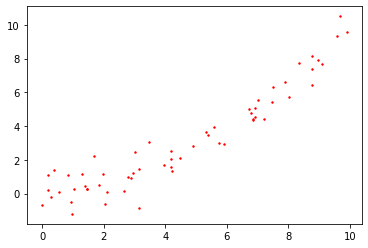

In [16]:
plt.scatter(x, y, c ='red',s=2)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

Based on observations from LR2, we can conclude that adding polynomial features (complicating the model) increases accuracy. Let's try to plot a graph showing the relationship between the R2 metric and the degree of polynomial features in the model. This parameter can be considered a hyperparameter of the model.

**Hyperparameters** are external configuration variables that data scientists use to manage the training of the ML model. Hyperparameters (sometimes called model hyperparameters) are manually configured before training the model. By the way, the $\alpha$ coefficients in regularization formulas are also hyperparameters.

The graph of the hyperparameter's dependence on the model quality metric is called a **validation curve**.

In [18]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

As we can see, with an increase in the number of polynomial features, we observe a drop in the quality of validation on test data, while with an increase in quality on training data, we observe classic overfitting.

<font color = 'red' size = 5>Task 2. </font>

1. Model the overfitting of a linear regression model using artificial data.

2. Try to avoid overfitting by maintaining the complexity of the model, which increases quality, using different regularization models. Practice selecting regularization strength coefficients.

## <font color = 'green'> 3. Gradient descent.</font>

In the previous LR we solved the optimization problem by finding an analytical solution in the form of a formula. The method is good, but not always possible due to the properties of functions and data. Let's try to arm ourselves with another method for solving model training problems.

<font color = 'red' size = 5>Task 3. </font>

1. Study the basic [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm using the link or lecture notes.

2. Implement a simple gradient descent algorithm with a constant step to solve the problem of finding the minimum of some function of two variables. Graphically confirm your calculations (an example was shown in the lecture).

3. Using gradient descent, implement your own learning function for any of the regressions studied earlier. Test it thoroughly. Will your algorithm always converge (produce the correct solution)? What parameters does the algorithm's operation depend on? Compare the obtained results with built-in functions.
4. Think about improving the algorithm in terms of convergence.